## Libaries importing

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Insights

In [247]:
#Loading
df = pd.read_csv("train.csv").drop(["PassengerId", "Name", "Ticket", "Fare", ], axis=1)
df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
267,1,3,male,25.0,1,0,NaN,S
747,1,2,female,30.0,0,0,NaN,S
753,0,3,male,23.0,0,0,NaN,S
493,0,1,male,71.0,0,0,NaN,C
685,0,2,male,25.0,1,2,NaN,C
669,1,1,female,NaN,1,0,C126,S
793,0,1,male,NaN,0,0,NaN,C
707,1,1,male,42.0,0,0,E24,S
622,1,3,male,20.0,1,1,NaN,C
698,0,1,male,49.0,1,1,C68,C


Text(0.5, 1.0, 'Total Persons = 891')

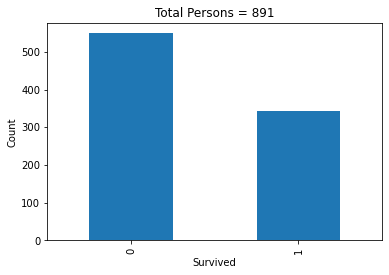

In [248]:
pd.value_counts(df.Survived).plot.bar()
plt.ylabel("Count");plt.xlabel("Survived")
plt.title(f"Total Persons = {sum(pd.value_counts(df.Survived))}")

## Data Processing

In [249]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Cabin        object
Embarked     object
dtype: object

In [250]:
df = df.replace('NaN', np.nan)
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
Embarked      2
dtype: int64

In [251]:
df = df.drop('Cabin', axis=1)
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S


## Missing value handling

In [252]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [253]:
#Droping Emabarked 2 rows having nan

df.Embarked.loc[df.Embarked.isna() == True].index

Int64Index([61, 829], dtype='int64')

In [254]:
df = df.drop([61, 829])

In [255]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      0
dtype: int64

In [256]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [257]:
# Dummies for Gender

df.Sex = pd.get_dummies(df.Sex, drop_first=True)

In [258]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S


In [259]:
Embarked_dummies = pd.get_dummies(df.Embarked, drop_first=True, prefix = 'Embarked')
Embarked_dummies.head(2)

,Embarked_Q,Embarked_S
0,0,1
1,0,0


In [260]:
Pclass_dummies = pd.get_dummies(df.Pclass, drop_first=True, prefix='Pclass')
Pclass_dummies.head(2)

,Pclass_2,Pclass_3
0,0,1
1,0,0


In [261]:
df = df.drop(['Pclass', 'Embarked'], axis=1)

In [243]:
df.head(2)

,Survived,Sex,Age,SibSp,Parch
0,0,1,22.0,1,0
1,1,0,38.0,1,0


In [263]:
df = pd.concat([df, Pclass_dummies, Embarked_dummies], axis = 1)

In [264]:
df.head(2)

,Survived,Sex,Age,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,0,1,0,1
1,1,0,38.0,1,0,0,0,0,0


### Using Iterative Imputer for handling missing value in Age

In [288]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [289]:
imputer = IterativeImputer(max_iter=10000, random_state=0)

In [290]:
features = df.drop("Survived", axis=1)
labels = df.Survived

In [291]:
features.head(2)

,Sex,Age,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,22.0,1,0,0,1,0,1
1,0,38.0,1,0,0,0,0,0


In [292]:
imputer.fit(features)
df_feautes = imputer.transform(features)

In [294]:
features = pd.DataFrame(df_feautes, columns=features.columns)

In [304]:
(features.Age.isna()==True).sum()

0

In [305]:
features.dtypes

Sex           float64
Age           float64
SibSp         float64
Parch         float64
Pclass_2      float64
Pclass_3      float64
Embarked_Q    float64
Embarked_S    float64
dtype: object

In [307]:
features.isna().sum()

Sex           0
Age           0
SibSp         0
Parch         0
Pclass_2      0
Pclass_3      0
Embarked_Q    0
Embarked_S    0
dtype: int64

## Modeling

In [329]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, accuracy_score

In [308]:
features.head(3)

,Sex,Age,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1.0,22.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,38.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0


In [310]:
assert len(labels) == len(features)

In [318]:
x_train, x_test, y_train, y_test = train_test_split(features, labels)

In [321]:
model = LogisticRegression().fit(x_train,y_train)

In [322]:
y_pred = model.predict(x_test)

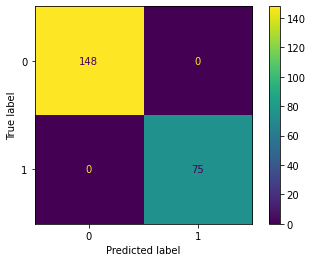

In [326]:
plot_confusion_matrix(model, x_test, y_pred)

In [331]:
accuracy_score(y_pred, y_test)

0.7937219730941704